#### Let's simulate a signal buried in random gaussian noise


We will use also Matplolib http://matplotlib.org/ to produce plots. 
Matplotlib is an excellent python library to produce any kind of plot you want.

In [1]:
### importing the library
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##number of point of the time series
nsample = 1024
## simulate a simple sinusoidal function
x1 = np.linspace(0, 100, nsample)
y=np.sin(x1)

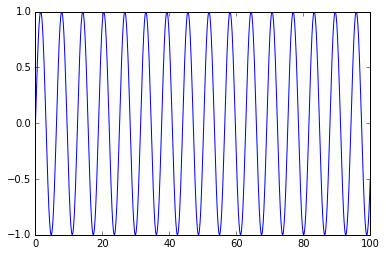

In [3]:
fig, ax = plt.subplots()
ax.plot(x1, y, label="Data")

##### Now we will add some noise. 
We use the numpy function random.normal to add Gaussian Noise with amplitude sigma.
The gaussian, or normal, distribution has the following probability density
\begin{equation}
p(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{\left(x-\mu\right)^2}{2\sigma^2}}
\end{equation}
A time series in which each sample is distributed according to a gaussian is called gaussian, white noise


In [4]:
sigma = 0.3
y =sigma * np.random.normal(size=nsample)

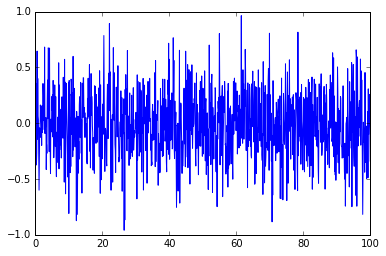

In [5]:
fig, ax = plt.subplots()
ax.plot(x1, y, label="Data")


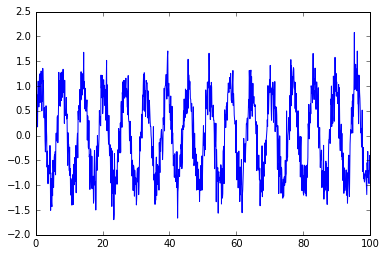

In [6]:
sigma = 0.3
y =np.sin(x1)+sigma * np.random.normal(size=nsample)
fig, ax = plt.subplots()
ax.plot(x1, y, label="Data")



#### ARMA model 
Now, let's do something more complex and simulate the time series using an AutoRegessive Moving Average (ARMA) model.
 
The Notation ARMA(p,q) indicates and AR part with p poles and MA part with q zeros. 
 
$$
x[n] =  \sum_{l=1}^{p} a[l]x[n-l] + \sum_{l=0}^{q} b[l]w[n-l] \ ;
$$
where $w$ is a white noise with unit variance.


We can do this in many different ways and using different python library, such as scipy and its module signal, or you can write all the code from scratch.
I want to learn more about this library StatsModels: http://statsmodels.sourceforge.net/.
So I'll learn with you how to do signal processing using statsmodels.


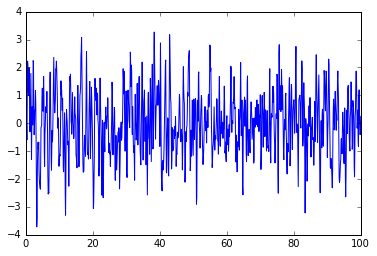

In [7]:
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(12345)

arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
arparams = np.r_[1, -arparams]
maparam = np.r_[1, maparams]

y = arma_generate_sample(arparams, maparams, nsample)
fig, ax = plt.subplots()
ax.plot(x1, y, label="Data") 

##### We will see in a next posts the difference of these time series in the Frequency domain representation
